# Phase 3 — Robust Inference and Regression Diagnostics

This notebook extends the baseline OLS model by addressing potential violations of classical regression assumptions.
Robust standard errors and diagnostic tests are employed to ensure valid statistical inference.

## Data Source

This analysis uses the cleaned and constructed dataset produced in `01_data_cleaning.ipynb`.
All composite variables and preprocessing steps are documented there.

In [1]:
# Imports
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

In [2]:
# Load cleaned data

df = pd.read_csv("../data/processed/ta_christian_constructed.csv")

In [3]:
X = df[["X1", "X2", "X3"]]
X = sm.add_constant(X)  
y = df["Y"]

ols_model = sm.OLS(y, X).fit()

In [4]:
ols_hc3 = ols_model.get_robustcov_results(cov_type="HC3")
print(ols_hc3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.909
Date:                Tue, 16 Dec 2025   Prob (F-statistic):              0.135
Time:                        16:23:29   Log-Likelihood:                -178.08
No. Observations:                  79   AIC:                             364.2
Df Residuals:                      75   BIC:                             373.6
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8652      3.382      2.621      0.0

### HC3 Robust Standard Errors

To account for potential heteroskedasticity, the OLS model was re-estimated using HC3 robust standard errors. While standard errors increase relative to the classical OLS specification, the main finding remains unchanged: knowledge of the US–China trade war (X2) retains statistical significance at the 5% level. This indicates that the primary inference is robust to violations of homoskedasticity.


In [5]:
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df

,Variable,VIF
0,const,88.887268
1,X1,1.509188
2,X2,1.057248
3,X3,1.467314


### Multicollinearity Assessment (VIF)

Variance Inflation Factors (VIF) were computed to assess multicollinearity among the explanatory variables.

All explanatory variables (X1, X2, X3) exhibit VIF values close to 1, well below the commonly used threshold of 5. This indicates that multicollinearity is not a concern in this model, and the estimated regression coefficients are stable and reliable.

The intercept term exhibits a high VIF, which is expected and not interpreted.

In [6]:
bp_test = het_breuschpagan(ols_model.resid, X)
labels = ["LM Statistic", "LM p-value", "F Statistic", "F p-value"]

dict(zip(labels, bp_test))

{'LM Statistic': np.float64(4.023809994285478),
 'LM p-value': np.float64(0.25890453229870325),
 'F Statistic': np.float64(1.341695941731232),
 'F p-value': np.float64(0.26728016865028276)}

### Heteroskedasticity Test (Breusch–Pagan)

A Breusch–Pagan test was conducted to assess whether the variance of the regression residuals depends on the explanatory variables.

The test yields p-values greater than 0.05 for both the LM and F statistics. Therefore, the null hypothesis of homoskedasticity cannot be rejected. This suggests no evidence of heteroskedasticity in the residuals.

Despite this result, HC3 robust standard errors are retained as a conservative robustness measure, particularly given the moderate sample size and survey-based data structure.

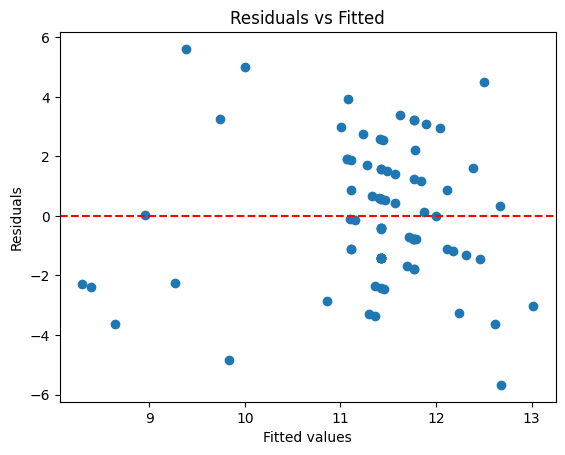

In [7]:
plt.scatter(ols_model.fittedvalues, ols_model.resid)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

### Residuals vs Fitted Values

The residuals versus fitted values plot shows a random scatter of points around zero with no discernible systematic pattern or curvature. This suggests that the linearity assumption is satisfied and that the model does not suffer from obvious misspecification.

The dispersion of residuals appears approximately constant across the range of fitted values, providing visual support for the absence of heteroskedasticity, consistent with the Breusch–Pagan test results.

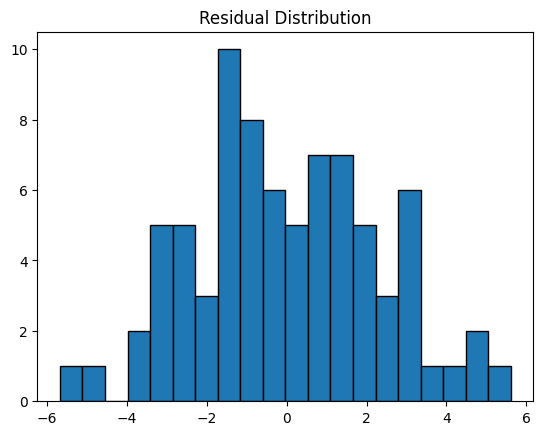

In [8]:
plt.hist(ols_model.resid, bins=20, edgecolor="black")
plt.title("Residual Distribution")
plt.show()

### Histogram of Residuals

The histogram of regression residuals exhibits an approximately symmetric, bell-shaped distribution centered around zero. While minor tail deviations are observed, no severe skewness or extreme outliers are present.

This visual evidence supports the assumption of approximate normality of the residuals and is consistent with the Jarque–Bera test results reported earlier.

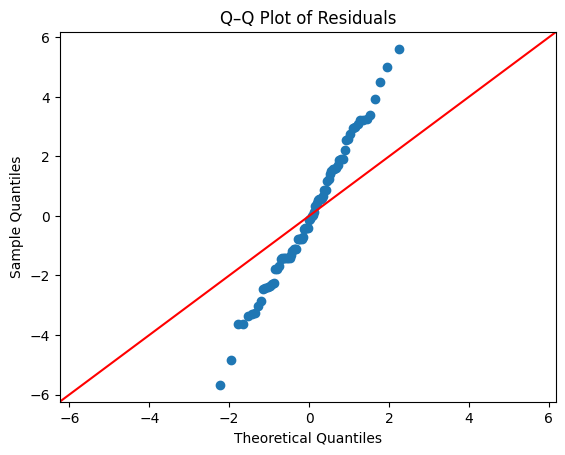

In [9]:
sm.qqplot(ols_model.resid, line="45")
plt.title("Q–Q Plot of Residuals")
plt.show()

### Q–Q Plot of Residuals

The Q–Q plot shows that the residuals closely follow the theoretical normal distribution along the central quantiles, with minor deviations observed in the tails. These tail deviations are symmetric and limited in magnitude.

Overall, the plot supports the assumption of approximate normality of residuals, which is sufficient for valid statistical inference, particularly in conjunction with robust (HC3) standard errors.

### Robustness Relative to Baseline OLS

Compared to the baseline OLS model, the HC3 robust standard errors yield similar coefficient estimates and identical substantive conclusions regarding statistical significance. This indicates that the original findings are robust to potential violations of classical regression assumptions.

**Status:** Phase 3 complete. Regression diagnostics and robustness checks indicate that the baseline OLS conclusions are statistically sound and robust to potential violations of classical assumptions.